In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import bayes_binomial as bayes

In [4]:
import scipy.stats as stats

In [5]:
def create_data(model_true_p, n1, n2, trials=10):
    models = np.array([1 if x > 0.5 else 2 for x in np.random.uniform(size=trials)])
    p1 = np.random.uniform(size=trials)
    p2 = np.random.uniform(size=trials)
    p2[models == 1] = p1[models==1]
    
    k1 = stats.binom.rvs(n1, p1)
    k2 = stats.binom.rvs(n2, p2)
    
    df = pd.DataFrame(list(zip(models, p1, p2, k1, [n1]*trials, k2, [n2]*trials)), 
                     columns=['true_model', 'p1', 'p2', 'k1', 'n1', 'k2', 'n2'])
    return df

In [6]:
def rowwise_score(row):
    if row['odds'] > 1: # guessing it's 2-pop
        if row['true_model'] == 1: # wrong
            score = -row['odds']
        else:
            score = 1 # right
    else: # guessing it's 1-pop
        if row['true_model'] == 1: # right
            score = 1
        else:
            score = -1/row['odds']
    return score
        

In [7]:
def rowwise_odds(row):
    return bayes.odds_different(row['k1'], row['n1'], row['k2'], row['n2'])

In [8]:
data = create_data(0.5, 100, 100, trials =500)

In [9]:
data['odds'] = data.apply(rowwise_odds, axis=1)

In [10]:
data['score'] = data.apply(rowwise_score, axis=1)

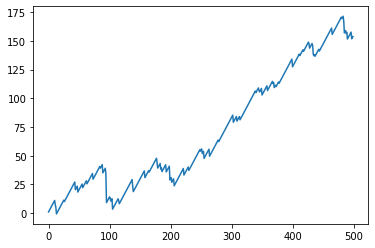

In [11]:
plt.plot(data['score'].cumsum())

In [12]:
data[data['score'] < 0]

,true_model,p1,p2,k1,n1,k2,n2,odds,score
11,1,0.636597,0.636597,55,100,72,100,3.756601,-3.756601
12,1,0.258246,0.258246,30,100,16,100,2.312105,-2.312105
13,2,0.263531,0.285723,30,100,27,100,0.176646,-5.661034
26,1,0.800384,0.800384,85,100,73,100,1.228631,-1.228631
44,1,0.168979,0.168979,10,100,25,100,6.604587,-6.604587
...,...,...,...,...,...,...,...,...,...
484,2,0.517580,0.543403,52,100,57,100,0.224068,-4.462930
485,2,0.968245,0.966219,93,100,95,100,0.099858,-10.014231
488,2,0.975119,0.936531,97,100,91,100,0.391252,-2.555894
490,2,0.763387,0.619420,68,100,66,100,0.172478,-5.797836


In [13]:
data['true_model'].value_counts()

1    258
2    242
Name: true_model, dtype: int64

In [14]:
data[data['score'] < 0]['true_model'].value_counts()

2    48
1    18
Name: true_model, dtype: int64

<AxesSubplot:ylabel='Frequency'>

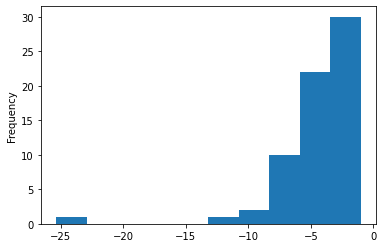

In [15]:
data[data['score'] < 0]['score'].plot.hist()

In [16]:
max(data[data['score'] < 0]['score'])

-1.0306735972641923

In [17]:
data[data['score'] < 0][data['score'] > -1.5]

/tmp/ipykernel_3980/3721402541.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['score'] < 0][data['score'] > -1.5]


,true_model,p1,p2,k1,n1,k2,n2,odds,score
26,1,0.800384,0.800384,85,100,73,100,1.228631,-1.228631
85,2,0.565434,0.562276,65,100,53,100,0.754913,-1.324655
101,2,0.210783,0.262886,14,100,25,100,0.936558,-1.067740
165,1,0.210314,0.210314,17,100,29,100,1.107425,-1.107425
249,1,0.431173,0.431173,51,100,37,100,1.254286,-1.254286
279,1,0.740081,0.740081,79,100,66,100,1.282598,-1.282598
340,1,0.601991,0.601991,51,100,65,100,1.275750,-1.275750
346,2,0.524925,0.443917,54,100,42,100,0.732834,-1.364565
373,1,0.882698,0.882698,93,100,83,100,1.188853,-1.188853
378,1,0.358874,0.358874,30,100,43,100,1.030674,-1.030674


In [18]:
data[data['score'] < -5]

,true_model,p1,p2,k1,n1,k2,n2,odds,score
13,2,0.263531,0.285723,30,100,27,100,0.176646,-5.661034
44,1,0.168979,0.168979,10,100,25,100,6.604587,-6.604587
48,2,0.273563,0.344891,29,100,33,100,0.195168,-5.123798
89,2,0.854754,0.830323,87,100,90,100,0.139416,-7.172754
95,2,0.984815,0.988374,99,100,100,100,0.039408,-25.375622
105,2,0.091947,0.136522,11,100,11,100,0.110540,-9.046485
138,2,0.744231,0.742885,75,100,78,100,0.168421,-5.937500
158,2,0.843423,0.817622,87,100,83,100,0.170713,-5.857783
193,1,0.717602,0.717602,82,100,65,100,6.267390,-6.267390
199,2,0.039479,0.017821,4,100,2,100,0.083656,-11.953662


In [19]:
data[data['odds'] > 5]["true_model"].value_counts()

2    174
1      3
Name: true_model, dtype: int64

In [20]:
data[data['odds'] > 3]["true_model"].value_counts()

2    182
1      4
Name: true_model, dtype: int64

In [28]:
data.to_csv("test.csv", index=False)

In [29]:
recover = pd.read_csv("test.csv")

In [30]:
recover

,true_model,p1,p2,k1,n1,k2,n2,odds,score
0,1,0.057558,0.057558,8,100,3,100,2.539346e-01,1.000000
1,2,0.708968,0.406968,77,100,41,100,1.395100e+05,1.000000
2,1,0.496281,0.496281,57,100,50,100,2.848079e-01,1.000000
3,1,0.693900,0.693900,72,100,77,100,2.116092e-01,1.000000
4,1,0.874226,0.874226,81,100,84,100,1.556684e-01,1.000000
...,...,...,...,...,...,...,...,...,...
495,2,0.825922,0.644828,80,100,63,100,5.427048e+00,1.000000
496,2,0.711283,0.370695,75,100,34,100,5.652346e+06,1.000000
497,1,0.647147,0.647147,56,100,74,100,5.807297e+00,-5.807297
498,1,0.098301,0.098301,13,100,7,100,2.793303e-01,1.000000
